In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [52]:
# Load the data
directory = os.getcwd()
file_path = os.path.join(directory, 'data.csv')
df = pd.read_csv(file_path, encoding='cp1251')

# Rename columns if necessary
# df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

# Parse the date column and set it as the index
#df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.set_index('date', inplace=True)

# Assume the target variable to forecast is the first column
target_variable = df.columns[0]

# Create lag features
df['lag_1'] = df[target_variable].shift(1)
df['lag_2'] = df[target_variable].shift(2)
df['lag_3'] = df[target_variable].shift(3)
df['lag_4'] = df[target_variable].shift(4)
df['lag_5'] = df[target_variable].shift(5)
df['lag_6'] = df[target_variable].shift(6)

# Display the first few rows
print(df.head())

               CPI   lag_1   lag_2   lag_3   lag_4  lag_5  lag_6
date                                                            
2016-01-01  109.77     NaN     NaN     NaN     NaN    NaN    NaN
2016-02-01  108.06  109.77     NaN     NaN     NaN    NaN    NaN
2016-03-01  107.27  108.06  109.77     NaN     NaN    NaN    NaN
2016-04-01  107.25  107.27  108.06  109.77     NaN    NaN    NaN
2016-05-01  107.31  107.25  107.27  108.06  109.77    NaN    NaN


In [73]:
# Split the data into training and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

display(train.head(2))
display(train.tail(2))
display(test.head(2))
display(test.tail(2))

,CPI,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
date,,,,,,,
2016-01-01,109.77,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,108.06,109.77,NaN,NaN,NaN,NaN,NaN


,CPI,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
date,,,,,,,
2022-07-01,115.1,115.9,117.1,117.83,116.69,109.15,108.73
2022-08-01,114.3,115.1,115.9,117.10,117.83,116.69,109.15


,CPI,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
date,,,,,,,
2022-09-01,113.68,114.30,115.1,115.9,117.1,117.83,116.69
2022-10-01,112.63,113.68,114.3,115.1,115.9,117.10,117.83


,CPI,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
date,,,,,,,
2024-04-01,107.84,107.72,107.69,107.44,107.42,107.48,106.69
2024-05-01,108.30,107.84,107.72,107.69,107.44,107.42,107.48


In [74]:
y_train_mean = train[target_variable].mean()
train['lag_1'].fillna(y_train_mean, inplace = True)
train['lag_2'].fillna(y_train_mean, inplace = True)
train['lag_3'].fillna(y_train_mean, inplace = True)
train['lag_4'].fillna(y_train_mean, inplace = True)
train['lag_5'].fillna(y_train_mean, inplace = True)
train['lag_6'].fillna(y_train_mean, inplace = True)

X_train = train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_train = train[target_variable]
X_test = test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = test[target_variable]

c:\Users\lysov\Documents\GitHub\CBR-DS-Tech-Task\venv\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
# Baseline Model: Mean Forecast
def mean_forecast(train, test):
    mean_value = train.mean()
    predictions = [mean_value] * len(test)
    return predictions

# Baseline Model: Naive Forecast
def naive_forecast(train, test):
    predictions = np.repeat(train.iloc[-1], len(test))
    return predictions

# Machine Learning Model: Linear Regression
def linear_regression_forecast(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Machine Learning Model: Random Forest
def random_forest_forecast(X_train, y_train, X_test):
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Advanced Machine Learning Model: CatBoost
def catboost_forecast(X_train, y_train, X_test):
    model = CatBoostRegressor(verbose=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Advanced Machine Learning Model: XGBoost
def xgboost_forecast(X_train, y_train, X_test):
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Time Series Model: Exponential Smoothing
#def exp_smoothing_forecast(train, test):
#    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
#    model_fit = model.fit()
#    predictions = model_fit.forecast(len(test))
#    return predictions

# Time Series Model: SARIMA with auto_arima
#def sarima_forecast(train, test):
#    model = auto_arima(train, seasonal=True, m=12)  # Assuming monthly data with yearly seasonality
#    predictions = model.predict(n_periods=len(test))
#    return predictions

# Evaluate the models
def evaluate_model(name, X_train, y_train, X_test, y_test, forecast_func):
    if name in ['Mean Forecast', 'Naive Forecast', 'Exponential Smoothing', 'SARIMA']:
        predictions = forecast_func(y_train, y_test)
    else:
        predictions = forecast_func(X_train, y_train, X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name} RMSE: {rmse:.3f}")
    return predictions

Mean Forecast RMSE: 3.920
Naive Forecast RMSE: 7.461
Linear Regression RMSE: 1.670
Random Forest RMSE: 3.440
CatBoost RMSE: 3.134
XGBoost RMSE: 3.452


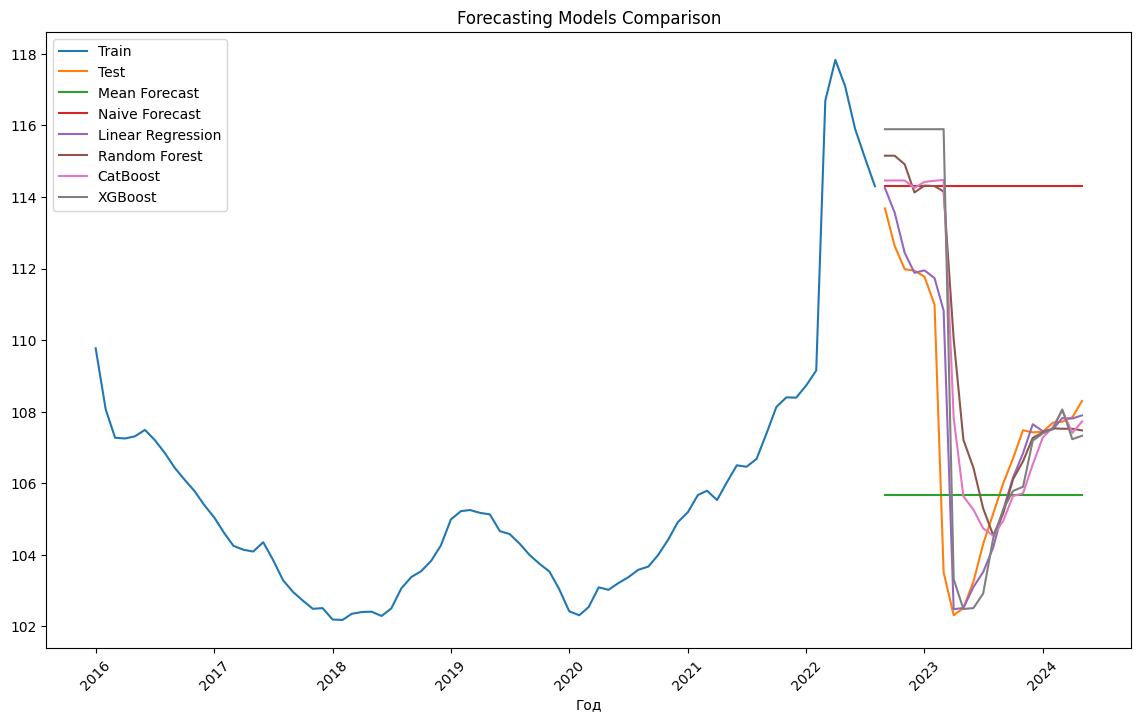

In [76]:
# List of models to evaluate
models = [
    ('Mean Forecast', mean_forecast),
    ('Naive Forecast', naive_forecast),
    ('Linear Regression', linear_regression_forecast),
    ('Random Forest', random_forest_forecast),
    ('CatBoost', catboost_forecast),
    ('XGBoost', xgboost_forecast)
    #('Exponential Smoothing', exp_smoothing_forecast),
    #('SARIMA', sarima_forecast)
]

# Evaluate all models and plot results
plt.figure(figsize=(14, 8))
plt.plot(train.index, y_train, label='Train')
plt.plot(test.index, y_test, label='Test')

for name, model in models:
    predictions = evaluate_model(name, X_train, y_train, X_test, y_test, model)
    plt.plot(test.index, predictions, label=name)

plt.legend()
plt.title('Forecasting Models Comparison')
# Устанавливаем метки делений на оси x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Поворот меток для лучшей читаемости
plt.xlabel('Год')  # Добавляем подпись оси x

plt.show()